In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

48.6%

100.0%
100.0%


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100.0%
100.0%


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



30.4%

100.0%
100.0%


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



100.0%
100.0%

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



In [4]:
dataiter = iter(trainloader)
images, labels = next(dataiter)


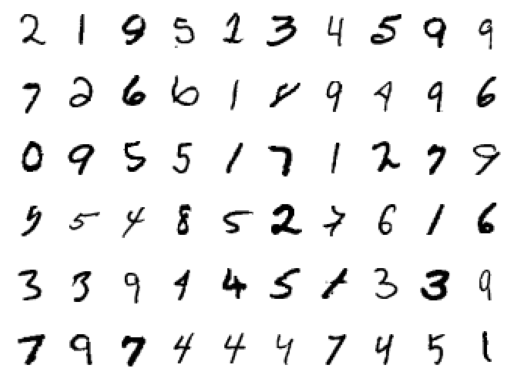

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [6]:
#define the model's parameters
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

'''
#Test this later
model = nn.Sequential(nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2),
                      nn.MaxPool1d(kernel_size=2),
                      nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=128, out_channels=128, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=256, out_channels=256, kernel_size=5, stride=1, padding=2),
                      nn.Dropout(p=0.2),
                      nn.Linear(256 * 8, 512),
                      nn.Linear(512, 256),
                      nn.Linear(256, 128),
                      nn.Linear(128, 64),
                      nn.Linear(64, 32),
                      nn.Linear(32, num_classes))
'''

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


'\n#Test this later\nmodel = nn.Sequential(nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2),\n                      nn.MaxPool1d(kernel_size=2),\n                      nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=128, out_channels=128, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=256, out_channels=256, kernel_size=5, stride=1, padding=2),\n                      nn.Dropout(p=0.2),\n                      nn.Linear(256 * 8, 512),\n      

In [7]:
#Criterion is the target function we are maximizing/minimizing
#Optimizer is the algorithm we are using to minimize/maximize the criterion

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [8]:
#Train the model

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    #trainloader has a batch size of 64. Each loop will go through 64 images
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Erase accumulated gradients
        optimizer.zero_grad()
        
        #forward pass with a tensor of images
        output = model(images)
        
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.638385511569377

Training Time (in minutes) = 0.0630676547686259
Epoch 1 - Training loss: 0.27527425791631377

Training Time (in minutes) = 0.12600248257319133
Epoch 2 - Training loss: 0.21466939306970853

Training Time (in minutes) = 0.18770175377527873
Epoch 3 - Training loss: 0.17454159683557843

Training Time (in minutes) = 0.2514807343482971
Epoch 4 - Training loss: 0.1461789238967621

Training Time (in minutes) = 0.3129707336425781
Epoch 5 - Training loss: 0.12583944715384734

Training Time (in minutes) = 0.3750404198964437
Epoch 6 - Training loss: 0.1107817705678962

Training Time (in minutes) = 0.4375711997350057
Epoch 7 - Training loss: 0.09825422275446054

Training Time (in minutes) = 0.5020267883936564
Epoch 8 - Training loss: 0.08962130140828918

Training Time (in minutes) = 0.565234367052714
Epoch 9 - Training loss: 0.08081932558860781

Training Time (in minutes) = 0.6272823532422384
Epoch 10 - Training loss: 0.07316812655445673

Training Time (i

In [9]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [10]:
#calculate accuracy of the model

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9757


In [11]:
#THIS IS A TEST ITS NOT NEEDED
#print the weights of the model
for name, module in model.named_children():
    if isinstance(module, nn.Linear):
        print(name)
        print(module.weight.data)

0
tensor([[-2.5767e-03, -4.4746e-03, -2.4707e-02,  ..., -3.2770e-02,
          1.7058e-02, -3.6603e-02],
        [-2.0662e-02, -2.9308e-02, -3.8368e-02,  ..., -3.1002e-02,
          5.6122e-03,  2.3533e-02],
        [-1.1271e-02,  2.7914e-02, -3.4612e-02,  ...,  1.4255e-02,
         -3.2845e-02, -1.4840e-02],
        ...,
        [-1.6038e-02, -8.9739e-03,  6.9317e-03,  ..., -2.4298e-02,
         -1.1441e-02,  6.2976e-03],
        [ 2.9257e-02,  3.3993e-02,  3.3322e-02,  ...,  1.8125e-02,
         -2.9636e-02,  2.9957e-05],
        [-3.4361e-02, -1.7831e-02, -1.2989e-02,  ..., -2.0802e-02,
         -3.7282e-02, -1.4719e-02]])
2
tensor([[ 0.0405, -0.0248,  0.0534,  ...,  0.0886,  0.0149,  0.0343],
        [ 0.0095,  0.0263,  0.0376,  ..., -0.0542, -0.0248,  0.0013],
        [ 0.1255, -0.1604,  0.0672,  ...,  0.1363, -0.0540, -0.0056],
        ...,
        [ 0.0698,  0.1060,  0.0190,  ..., -0.0573,  0.0626, -0.0064],
        [ 0.0095,  0.0279,  0.0579,  ...,  0.0582,  0.1944, -0.1162],
 

In [12]:
dataiter = iter(valloader)
images, labels = next(dataiter)

#we need to flatten the image to pass it to the model
output = model(images[0].view(1,-1))

#argmax returns the index of the maximum value in a tensor, and .item() returns the value inside the tensor if it is a single value
print(torch.argmax(output, dim=1))

tensor([6])


In [13]:
#split the model
frontend_model = nn.Sequential(*list(model.children())[:2])
backend_model = nn.Sequential(*list(model.children())[2:])

output = backend_model(frontend_model(images[15].view(1,-1)))                  

6


In [41]:
#Flask Server
from flask import Flask, request
import threading
import pickle
import torch

app = Flask(__name__)

@app.route('/inference', methods=['POST'])
def inference():
    # Deserialize the model and data
    backend_model = pickle.loads(request.files['model'].read())
    data = pickle.loads(request.files['data'].read())

    # Run the inference
    results = backend_model(data)

    # Serialize the results and send them back to the client
    return pickle.dumps(results)

# Run the server in a separate thread
def run_server():
    app.run(host='0.0.0.0', port=10000)

server_thread = threading.Thread(target=run_server)
server_thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 10000 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [38]:
#Flask Client
#Copy this code snippet to another device don't run it here
import requests
import torch
import pickle

port_num = "10000"
local_ip = "192.168.1.130"

# Serialize the model and data
serialized_model = pickle.dumps(backend_model)
serialized_data = pickle.dumps(frontend_model(images[12].view(1,-1)))

# Send the model and data to the server
response = requests.post(f'http://{local_ip}:{port_num}/inference', 
                         files={'model': serialized_model, 'data': serialized_data})

# Deserialize the results
results = pickle.loads(response.content)

print(torch.argmax(results, dim=1).item())

9


In [26]:
'''
import boto3
import json
import io
import base64
import requests

boto3.setup_default_session(profile_name='admin')
lambda_client = boto3.client('lambda', region_name='us-east-2')

buffer = io.BytesIO()
torch.save(backend_model.state_dict(), buffer)
model_bytes = buffer.getvalue()
model_base64 = base64.b64encode(model_bytes).decode('utf-8')

payload = {
    'input' : frontend_model(images[0].view(1,-1)).tolist(),
    'model' : model_base64
}

response = lambda_client.invoke(
    FunctionName='splitML',
    InvocationType='RequestResponse',
    Payload=json.dumps(payload)
)
print(response['Payload'].read())

#response = requests.post('http://localhost:9000/predict', json=payload)
print(response.json())
'''

b'{"errorMessage": "Unable to import module \'lambda_function\': No module named \'torch\'", "errorType": "Runtime.ImportModuleError", "requestId": "1dfcb3f8-96c6-4e5f-9941-aca318c9768f", "stackTrace": []}'


AttributeError: 'dict' object has no attribute 'json'